<h1><center> Data Analysis & Feature Engineering </center></h1>

## Import Libraries :

In [1]:
# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import plotly.express as px
import plotly.graph_objects as go

## Import des données

**Despription Macro des Datasets :**

- Il y a deux ensembles de données. L'un est un ensemble de données d'enchérisseurs qui comprend une liste d'informations sur les enchérisseurs, y compris leur identifiant, leur compte de paiement et leur adresse. L'autre est un ensemble de données d'enchères qui comprend 7,6 millions d'enchères sur différentes enchères. Les enchères de cet ensemble de données sont toutes effectuées par des appareils mobiles.

- La plateforme d'enchères en ligne a un incrément fixe de montant en dollars pour chaque enchère, donc elle n'inclut pas un montant pour chaque enchère.

> Description des colonnes du Bids Dataset  :

- `bid_id` - Identifiant unique pour cette enchère

- `bidder_id` - Identifiant unique d'un enchérisseur (identique à l'enchérisseur_id utilisé dans train.csv et test.csv)

- `auction` - Identifiant unique d'une enchère

- `merchandise` - La catégorie de la campagne du site d'enchères, ce qui signifie que l'enchérisseur pourrait venir sur ce site en recherchant des "articles pour la maison" mais finit par enchérir pour des "articles de sport" - et cela conduit à ce champ étant "articles pour la maison". Ce champ catégorique pourrait être un terme de recherche ou une publicité en ligne.

- `device` - Modèle de téléphone d'un visiteur

- `time` - Heure à laquelle l'enchère est effectuée (transformée pour protéger la vie privée).

- `country` - Le pays auquel l'adresse IP appartient

- `ip` - Adresse IP d'un enchérisseur (obscurcie pour protéger la vie privée).

- `url` - URL à partir de laquelle l'enchérisseur a été référé (obscurcie pour protéger la vie privée).

In [2]:
data_bids = pd.read_csv('Data/bids.csv')
data_bids.sample(5)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
5868354,5868354,2106dd7866abbfb4e7c68067d7eb9bebflq5d,frelq,jewelry,phone50,9699299368421052,za,37.82.251.208,rh5j9bavl3nnwtq
2143907,2143907,5fcec311d29fdcdc8f1b662eb2068997xt2oc,h1ko2,sporting goods,phone795,9771671210526315,tr,143.171.200.176,u4vndzkb0g1w6jg
411306,411306,76f17ce227e593aeff456fed46e36c83a3j72,boegs,mobile,phone212,9761537684210526,uk,199.50.0.10,v6js9ai8pgrxrg2
6576436,6576436,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,uvnl7,sporting goods,phone35,9703358157894736,ng,33.156.38.204,gavdutxwg0vi1gn
178829,178829,45bd56666e7f3693a319ac24d7dd4046m5ime,jefix,home goods,phone142,9759803789473684,in,87.241.45.140,vasstdc27m7nks3


> Description des colonnes  du Train Data:

- `bidder_id` - Identifiant unique d'un enchérisseur.

- `payment_account` - Compte de paiement associé à un enchérisseur. Ces informations sont obscurcies pour protéger la vie privée.

- `address` - Adresse postale d'un enchérisseur. Ces informations sont obscurcies pour protéger la vie privée.

- `outcome` - Étiquette d'un enchérisseur indiquant s'il s'agit ou non d'un robot. La valeur 1.0 indique un robot, tandis que la valeur 0.0 indique un être humain.

In [3]:
data_train=pd.read_csv('Data/train.csv')
data_train.sample(5)

,bidder_id,payment_account,address,outcome
1449,238808859d7752579a415e89a395500fh2o65,a3d2de7675556553a5f08e4c88d2c228evk1f,4fd51de375605e5dca2dc94413a72c4dod9gq,1.0
543,37ebf34eaeb8a434976416c34ed5c6d8ywyoj,a3d2de7675556553a5f08e4c88d2c228y1jsl,f8a6796ebda4c859969a090e7c1c7c65nnvne,0.0
1639,c9416e793bd0559bca3ad4a5194d4cd1k8eyc,a3d2de7675556553a5f08e4c88d2c228ieo35,a3d2de7675556553a5f08e4c88d2c228jy3mj,0.0
1917,1870650d20a97db60ce4133bb9352b69h9phj,a3d2de7675556553a5f08e4c88d2c228o3vbx,5ac1fd5b35b8af98fc0e540f5875f2efvnpf8,0.0
374,7f86c3c417ae1db5bea10bf9d0a7827ct3ni4,a3d2de7675556553a5f08e4c88d2c2280rc4t,efed968be472133f24bd70f9412c156dad2ib,0.0


## Analyses :

### Cardinalité des colonnes


In [4]:
data_bids.nunique().sort_values()


merchandise         10
country            199
bidder_id         6614
device            7351
auction          15051
time            776529
url            1786351
ip             2303991
bid_id         7656334
dtype: int64

In [5]:
# Compter les valeurs nulles pour chaque colonne
null_count_per_column = data_bids.isnull().sum()

# Afficher le nombre de valeurs nulles par colonne
print(null_count_per_column)

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64


Traitement des valeurs nulles de la colonne country

In [6]:
unique_countries = data_bids['country'].value_counts()
unique_countries

country
in    1788731
ng     586586
id     453611
tr     319574
us     318103
       ...   
an          2
er          2
gp          2
mh          1
tc          1
Name: count, Length: 199, dtype: int64

In [7]:
unique_countries = data_bids['country'].value_counts()
fig = px.bar(data_bids, x=unique_countries.index, y=unique_countries.values)
fig.show()

In [8]:
missing_percent = data_bids['country'].isnull().mean()
print(f"Percentage of missing data in country column: {missing_percent*100: .2f}%")

Percentage of missing data in country column:  0.12%


> Les valeurs nulle ne représentent que 0.12% des valeurs de country `in` donc nous pouvons replacer les valeur nulles par `in`

In [9]:
data_bids['country'] = data_bids['country'].fillna(data_bids['country'].mode()[0])

> Les proportions des enchère robotiques et des enchères humains dans notre data set

In [10]:
unique_labels = data_train['outcome'].value_counts()
fig = px.bar(data_bids, x=unique_labels.index, y=unique_labels.values)
fig.show()

<div class="alert alert-block alert-warning">
<b>Remarque :</b>

-  Les enchères de label **0** sont beaucoup plus important
</div>

## Création des fonctions pour l'ensemble des pré-traitement :

- Nous souhaitons écrire ces pré-traitement sous forme des fonctions afin de pouvoir les appliquer sur l'ensemble de test où pour les données à prédire au futur.

- Donc notre but est de préparer la dataset `train` en ajoutant des colonnes à partir du `Bids Dataset`

### Première fonction :

> Nous allons créer une fonction qui nous permet de calculer le nombre unique de chaque caractéristiques qu'on trouve dans `Bids Dataset`. Pour ce faire :

1. Nous allons faire un groubby(`bidder_id`) sur la dataset `Bids` et nous allons prendre comme aggrégation le `nunique` c'est à dire le nombre unique des valeurs de chaque colonnes

2. Puis, nous allons ajouter ces colonnes à notre `train` dataset, en faisant un merge sur le `bider_id`

3. Finalement, nous allons remplir les valeurs manquantes par des `0`. En effet, nous pouvons considérer les `bidder_id` contenant des valeurs manquantes comme ils n'ont jamais fait une enchère et parsuite nous pouvons remplacer ces valeurs manquantes par des `0`.

In [11]:
def count_columns(data_bids,data_train):
  bidder_unique = data_bids.groupby("bidder_id").nunique().reset_index()
  bidder_unique = bidder_unique.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
  train_set = data_train.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
  train_set = train_set.fillna(0)
  return train_set

In [12]:
train_set= count_columns(data_bids, data_train)
train_set.sample(5)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url
1092,bf8de839c1a8b7994d19049667548e4ewchpm,0.0,10.0,9.0,1.0,6.0,10.0,1.0,7.0,5.0
1109,c900620a019e78a3eee44109e4d1e1d2xd2gj,0.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
1999,4070f6ad5da385ba11cc99183817eb20h69v1,0.0,15.0,13.0,1.0,12.0,15.0,8.0,12.0,9.0
1676,ce7d34398a6d6011bcd96ff0aa82b6674hxzl,0.0,7.0,6.0,1.0,4.0,7.0,5.0,7.0,3.0
1828,35f822bee4f85d98d5b1b23c65681974ywyuv,0.0,3.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0


## Features depuis la colonne time

> Comparaisons entre les comportements en utilisant **time**

L'ordre relatif et les échelles de temps peuvent être utile pour les comparaisons entre les comportements en utilisant le temps. En effet, l'analyse temporelle des comportements d'enchères peut révéler des schémas réguliers ou des anomalies, permettant la distinction entre les enchérisseurs humains et les robots automatisés.

### Deuxième fonction :

1. Création des features lié au temps.

2. Une observation intéressante est que certains enchérisseurs n'ont aucun délai entre deux enchères. Intuitivement, les robots peuvent être capables de réaliser cela plus fréquemment qu'un être humain moyen, donc nous pouvons examiner les valeurs où la différence de temps est égale à `0`. Nous étiquetons de telles enchères comme des enchères concurrentes.

In [15]:
def time_preprocessing(data_bids,data_train):
  # Trie le DataFrame "bids" en fonction des colonnes 'bidder_id' et 'time'
  # pour obtenir une vue chronologique des enchères par enchérisseur.
  time_df = data_bids.sort_values(['bidder_id', 'time'])
  # crée une nouvelle Serie appelée :
  #'firstdiff' qui contient la différence de temps entre chaque enchère consécutive pour chaque enchérisseur.
  firstdiff = time_df.groupby('bidder_id')[['time']].diff()
  time_df['first_diff'] = firstdiff
  firstdiff_feat = time_df[['bidder_id', 'first_diff']].dropna()
  # Pour chaque Enrichésseur nous allons tirer des cartéristiques telles que le `max`, le `min`, etc...
  bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
  bid_intervals = bid_intervals.droplevel(axis=1, level=0)
  bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
  # Nous allons calculer la différence interquartile (IQR) pour chaque groupe en soustrayant le premier quartile (Q1 (25%)) du troisième quartile (Q3 (75%)).
  # En effet, l'IQR est une mesure de dispersion statistique qui représente la plage interquartile des données.
  bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
  bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
  data_train = data_train.merge(bid_intervals, on='bidder_id', how='left')
  data_train = data_train.fillna(data_train[['mean_diff','std_diff','min_diff','median_diff','max_diff','iqr_diff']].median())
  #num des fois d'être premiers au bid
  concurrent_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
  # Créer une Série avec les bidder_id et combien de fois il a un temps de différence nulle
  concurrent_bids = concurrent_bids.rename(columns = {'first_diff': 'num_concurrent_bids'})
  data_train =  data_train.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)
  first_bid = data_bids.sort_values(['auction', 'time'])
  first_bid = first_bid.groupby('auction').first().reset_index()
  first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
  first_bid = first_bid.rename(columns = {'bid_id': 'num_first_bid'})
  #num de last bid
  last_bid = data_bids.sort_values(['auction', 'time'], ascending = [True, False])
  last_bid = last_bid.groupby('auction').first().reset_index()
  last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
  last_bid = last_bid.rename(columns = {'bid_id': 'num_last_bid'})
  # Ajout des colonnes de first_bid et last_bid
  data_train = data_train.merge(first_bid, on='bidder_id', how='left').fillna(0)
  data_train = data_train.merge(last_bid, on='bidder_id', how='left').fillna(0)

  return data_train

In [16]:
train_set = time_preprocessing(data_bids,train_set)
train_set.sample(5)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff,num_concurrent_bids,num_first_bid,num_last_bid
599,7a71e329f3f2da98a3f82e7bfcb705a0t5822,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,578947368.0,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0
1327,f725c5b4cece8353da7a636fcba0ecb5yxshd,0.0,282.0,77.0,1.0,30.0,282.0,4.0,88.0,10.0,2.750146e+11,2.984722e+12,52631580.0,4.100000e+10,5.006200e+13,9.942105e+10,0.0,0.0,0.0
1269,9df0031595e4105e4530ceee1a08faf319vvb,0.0,136.0,51.0,1.0,78.0,136.0,21.0,115.0,71.0,5.716121e+11,4.338727e+12,210526316.0,8.021053e+10,5.028458e+13,2.012632e+11,0.0,0.0,1.0
248,b9080651d16e3d6d2d83e1c5debb55b0qpwbv,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,578947368.0,1.241184e+11,5.146526e+12,1.813816e+11,0.0,0.0,0.0
222,dd055846eb553ab8e953b084f2048d53bdqec,0.0,48018.0,406.0,1.0,274.0,42669.0,57.0,15337.0,254.0,2.840946e+08,3.763142e+08,0.0,1.578947e+08,6.052632e+09,3.157895e+08,5349.0,99.0,92.0


## Feature using time and auction

### Troisième fonction :

Nous définissons la durée de l'enchère comme la différence entre la première et la dernière enchère de cette enchère. Nous supposons que les robots surenchériront davantage vers la fin d'une enchère car enchérir tôt ne garantit pas vraiment que les robots ne seront pas surenchéri

In [17]:
def auction_preprocessing(data_bids, data_train):
  """
  Prétraitement des données d'enchères pour analyser la répartition des enchères par moitié de durée d'enchère.
  """

  # Sélectionner les colonnes 'bidder_id', 'auction', 'time' et trier par 'auction' puis par 'time'
  auct_duration = data_bids.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]

  # Regrouper par 'auction', calculer les valeurs maximales et minimales de 'time', puis calculer la durée de chaque enchère
  auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'auction'})
  auct_duration['auct_duration'] = auct_duration['max'] - auct_duration['min']

  # sorting des colonnes 'auction', 'time' et fusionner avec les données de durée des enchères
  time_ratio = data_bids.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
  time_ratio = time_ratio.merge(auct_duration, on='auction', how='left')
  time_ratio['temp'] = time_ratio['time'] - time_ratio['auct_duration'] / 2
  time_ratio['firsthalf'] = time_ratio['temp'] < time_ratio['min']

  # Calculer le pourcentage d'enchères pour chaque moitié de la durée de l'enchère par enchérisseur
  ratio_firsthalf = time_ratio[['bidder_id', 'firsthalf']].groupby('bidder_id').agg(['count', sum]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'bidder_id', 'count': 'num_total_bids', 'sum': 'num_firsthalf_bids'})
  ratio_firsthalf['num_secondhalf_bids'] = ratio_firsthalf['num_total_bids'] - ratio_firsthalf['num_firsthalf_bids']
  ratio_firsthalf['percent_firsthalf_bids'] = ratio_firsthalf['num_firsthalf_bids'] / ratio_firsthalf['num_total_bids']
  ratio_firsthalf['percent_secondhalf_bids'] = ratio_firsthalf['num_secondhalf_bids'] / ratio_firsthalf['num_total_bids']
  ratio_firsthalf = ratio_firsthalf.drop('num_total_bids', axis = 1)

  # Fusionner les données prétraitées avec le jeu de données d'entraînement
  data_train = data_train.merge(ratio_firsthalf, on='bidder_id', how='left').fillna(0)

  return data_train

In [18]:
train_set= auction_preprocessing(data_bids, train_set)
train_set.sample(5)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,median_diff,max_diff,iqr_diff,num_concurrent_bids,num_first_bid,num_last_bid,num_firsthalf_bids,num_secondhalf_bids,percent_firsthalf_bids,percent_secondhalf_bids
272,81a6dd18d43cb3b1999176eea563b438roe7y,0.0,382.0,82.0,1.0,114.0,381.0,19.0,311.0,188.0,...,2.889474e+10,5.017953e+13,6.368421e+10,1.0,0.0,0.0,93.0,289.0,0.243455,0.756545
801,4c67576a6f30a158d16d790a7fc482b0zqxue,1.0,1859.0,78.0,1.0,189.0,1852.0,21.0,225.0,1456.0,...,5.657895e+09,5.004032e+13,1.194737e+10,7.0,0.0,1.0,299.0,1560.0,0.160839,0.839161
1146,03aafab9868455b78f0723eda86698ba9v9rm,0.0,10776.0,371.0,1.0,396.0,10589.0,77.0,4720.0,190.0,...,1.052632e+09,5.002674e+13,2.105263e+09,187.0,3.0,7.0,2913.0,7863.0,0.270323,0.729677
1812,c128bfe7aba668d71126d51b32428c01tkq99,0.0,418.0,70.0,1.0,120.0,417.0,7.0,270.0,80.0,...,1.231579e+10,1.015263e+12,2.584211e+10,1.0,0.0,1.0,79.0,339.0,0.188995,0.811005
1906,4089a2b7f26e5c13a7f3350bd52ebf8fh21nm,0.0,1272.0,102.0,1.0,186.0,1260.0,14.0,901.0,156.0,...,2.315789e+09,3.232632e+11,8.736842e+09,12.0,0.0,0.0,607.0,665.0,0.477201,0.522799


### Quatrième fonction :

1. Étant donné que l'objectif des bots est de remporter l'enchère, en supposant qu'un bot ne renonce pas à une enchère, le bot devrait réaliser plus d'enchères pour n'importe quelle enchère, de manière réaliste.

2. Nous déterminons le nombre maximum d'enchères réalisées avec le même appareil par un enchérisseur, puis nous vérifions si les humains et les bots ont des comportements différents en ce qui concerne le changement d'appareils.

In [19]:
def maxb_auct(data_bids, data_train):
  max_bids_in_auct = data_bids.groupby(['bidder_id', 'auction']).count().reset_index()[['bidder_id', 'auction', 'bid_id']].rename(columns = {'bid_id': 'max_bids_in_auct'})
  max_bids_in_auct = max_bids_in_auct[['bidder_id', 'max_bids_in_auct']].groupby('bidder_id').max().reset_index()
  data_train = data_train.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)
  device = data_bids.groupby(['bidder_id', 'device']).nunique()[['bid_id', 'auction']].reset_index().rename(columns = {'bid_id': 'max_bids_per_device', 'auction': 'num_auct_per_device'})
  device = device.groupby('bidder_id').max().reset_index()
  device['max_bids_per_device_per_auct'] = device['max_bids_per_device'] / device['num_auct_per_device']
  device = device[['bidder_id', 'max_bids_per_device', 'max_bids_per_device_per_auct']]

  data_train = data_train.merge(device, on='bidder_id', how='left').fillna(0)
  return data_train

In [20]:
train_set=maxb_auct(data_bids, train_set)
train_set.sample(5)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,num_concurrent_bids,num_first_bid,num_last_bid,num_firsthalf_bids,num_secondhalf_bids,percent_firsthalf_bids,percent_secondhalf_bids,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct
885,3ef757c3d6a272681c69bbd7e071b705yzt8t,0.0,3.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,1.0
145,36b84c776aea2e008180dbc72393ed750zsbr,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1152,daef74294e84ef6d7e009c2d51be6ee167xds,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0
1663,81392b54fee8e50ec74efb27cf0de8e32fdm5,0.0,3.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0
1565,e8bc0150097c1b2b8b8c374b69e0d3a6mxfcm,0.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.5,0.5,2.0,1.0,1.0


## Transformation des features

### Cinquième fonction :

Nous essayons de créer des caractéristiques qui ont du sens par intuition. Par exemple, le nombre d'enchères par enchère (`bids_per_auct`) peut être une caractéristique plus pertinente que simplement `num_bids` (nombre d'enchères) et `num_auct` (nombre d'enchères) séparément, car nous normalisons le nombre d'enchères effectuées par un enchérisseur par rapport au nombre total d'enchères auxquelles il a participé. Il en va de même pour les autres caractéristiques.

Encore une fois, nous comblons les valeurs manquantes avec `0` car elles indiquent les enchérisseurs sans informations d'enchères.

In [21]:
def feature_transformation(train_set):
 # Calcul du pourcentage d'enchères concurrentes par rapport au nombre total d'enchères
  train_set['percent_concurrent_bids'] = train_set['num_concurrent_bids'] / train_set['num_bids']

  # Calcul du nombre moyen d'enchères par enchère
  train_set['bids_per_auct'] = train_set['num_bids'] / train_set['num_auct']

  # Calcul du nombre moyen d'enchères par type d'appareil
  train_set['bids_per_device'] = train_set['num_bids'] / train_set['num_device_type']

  # Calcul du nombre moyen d'enchères par URL
  train_set['bids_per_url'] = train_set['num_bids'] / train_set['num_url']

  # Calcul du nombre moyen de types d'appareils par enchère
  train_set['device_per_auct'] = train_set['num_device_type'] / train_set['num_auct']

  # Calcul du nombre moyen d'adresses IP par pays
  train_set['ip_per_ctry'] = train_set['num_ip'] / train_set['num_ctry']

  # Calcul du pourcentage du nombre maximal d'enchères par appareil par rapport au nombre total d'enchères
  train_set['percent_max_bids'] = train_set['max_bids_per_device'] / train_set['num_bids']

  # Remplissage des valeurs manquantes (NaN) avec des zéros
  train_set = train_set.fillna(0)
  return train_set

In [22]:
train_set=feature_transformation(train_set)
train_set.sample(5)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_concurrent_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
1163,4b32495335dd238db6285f7c6bbe051fv1qoe,0.0,4.0,3.0,1.0,3.0,4.0,2.0,3.0,1.0,...,2.0,2.0,2.000000,0.0,1.333333,1.333333,4.000000,1.0,1.500000,0.500000
1768,fa918060747386f431a511c862565e34y1pdw,0.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,...,1.0,2.0,1.000000,0.0,1.000000,2.000000,2.000000,0.5,1.000000,1.000000
1178,1ccc69e376c95da9bd569a5d1a176874ivojs,0.0,19.0,10.0,1.0,8.0,19.0,3.0,17.0,6.0,...,7.0,8.0,1.333333,0.0,1.900000,2.375000,3.166667,0.8,5.666667,0.421053
210,4741959d26f99012b8a6a3e3954eae40hsy6j,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
358,72994bece8c918a2c4c432b98780a7bdsctwr,0.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.000000,0.0,1.000000,1.000000,2.000000,1.0,2.000000,0.500000


# Outliers

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'f35082c6d72f1f1be3dd23f949db1f577t6wd'),
  Text(1, 0, 'bd0071b98d9479130e5c053a244fe6f1muj8h'),
  Text(2, 0, '7fab82fa5eaea6a44eb743bc4bf356b3tarle'),
  Text(3, 0, '74a35c4376559c911fdb5e9cfb78c5e4btqew'),
  Text(4, 0, '91c749114e26abdb9a4536169f9b4580huern'),
  Text(5, 0, 'efc61ad6db17265a4bac85f77b154ef414tpp'),
  Text(6, 0, '238808859d7752579a415e89a395500fh2o65'),
  Text(7, 0, '0f3ee77a46dd5a09ad20b7c3e54ec614sbpvb'),
  Text(8, 0, '40e00fd204d0ce97110032bfc47f423d0bgrd'),
  Text(9, 0, 'd863897264a7e52d9c6a1be6dc453c6c9anz0')])

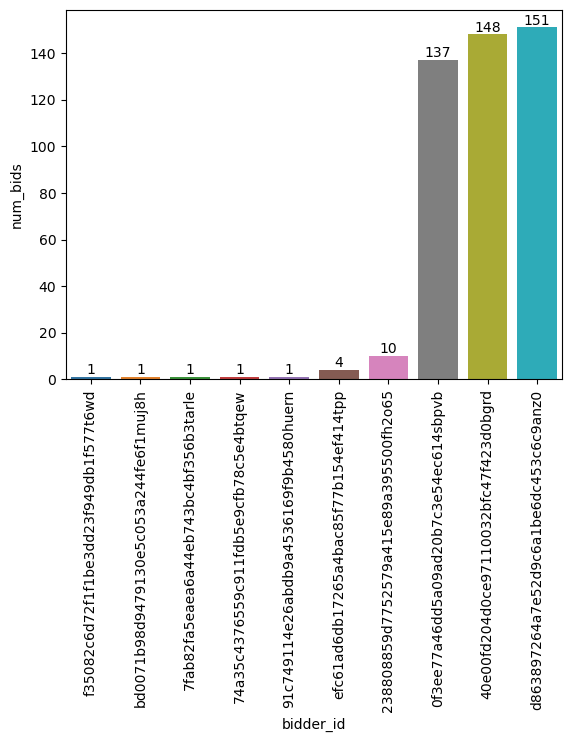

In [24]:
import seaborn as sns
fig, ax = plt.subplots()
num_bids_per_bot = sns.barplot(data = train_set[train_set['outcome'] == 1].sort_values('num_bids').head(10),
                               x = 'bidder_id',
                               y = 'num_bids',
                               ax = ax
                              )
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

<div class="alert alert-block alert-info">
<b>Remarque :</b>

Il y a des valeurs aberrantes, avec `5 robots` ayant seulement une seule enchère. Nous les supprimons car elles pourraient avoir un impact négatif sur les performances du modèle.

</div>

In [25]:
train_set[train_set['outcome'] == 1].sort_values('num_bids').head(6)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_concurrent_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
615,f35082c6d72f1f1be3dd23f949db1f577t6wd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
775,bd0071b98d9479130e5c053a244fe6f1muj8h,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
392,7fab82fa5eaea6a44eb743bc4bf356b3tarle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1669,74a35c4376559c911fdb5e9cfb78c5e4btqew,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1102,91c749114e26abdb9a4536169f9b4580huern,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
148,efc61ad6db17265a4bac85f77b154ef414tpp,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,3.0,2.0,2.0,0.0,2.0,1.333333,4.0,1.5,1.5,0.5


In [26]:
train_set = train_set.drop([615, 775, 392, 1669, 1102], axis = 0)

## Analyse exploratoire

In [ ]:
temp_df = data_bids.merge(data_train, on = 'bidder_id', how = 'left').dropna()
temp_df.groupby(['outcome', 'merchandise']).count()[['bid_id']].sort_values(['outcome', 'bid_id'], ascending = False)

bid_id
outcome merchandise             
1.0     mobile             84263
        sporting goods     74540
        jewelry            27635
        home goods          9664
        office equipment    7042
        computers           5334
        books and music      966
0.0     sporting goods    531298
        mobile            289130
        jewelry           246425
        home goods        179533
        office equipment   66480
        furniture          39469
        books and music     4715
        auto parts          4638
        computers           3184
        clothing             139


<div class="alert alert-block alert-info">
<b>Interprétation:</b>

Les trois principales marchandises pour lesquelles les humains et les robots font des enchères sont les mêmes, à savoir les articles de sport, les appareils mobiles et les bijoux. Certains articles tels que les biens pour la maison et les pièces automobiles ne sont pas proposés aux enchères par les robots. Cependant, ils représentent une petite proportion des enchères humaines. Nous choisissons de ne pas inclure les variables catégorielles dans notre modèle.

</div>

In [ ]:
train_set = train_set.drop('num_merch_type', axis = 1)

In [28]:
train_set = train_set.drop('bidder_id', axis = 1)

## Country

In [29]:
temp_df = data_bids.merge(data_train, on = 'bidder_id', how = 'left').dropna()
temp_df.groupby(['outcome', 'country']).count()[['bid_id']].sort_values(['outcome', 'bid_id'], ascending = False)


bid_id
outcome country        
1.0     in        86649
        us        66663
        id        20495
        de        18530
        th        17282
...                 ...
0.0     fo            1
        gn            1
        je            1
        mh            1
        mp            1

[382 rows x 1 columns]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

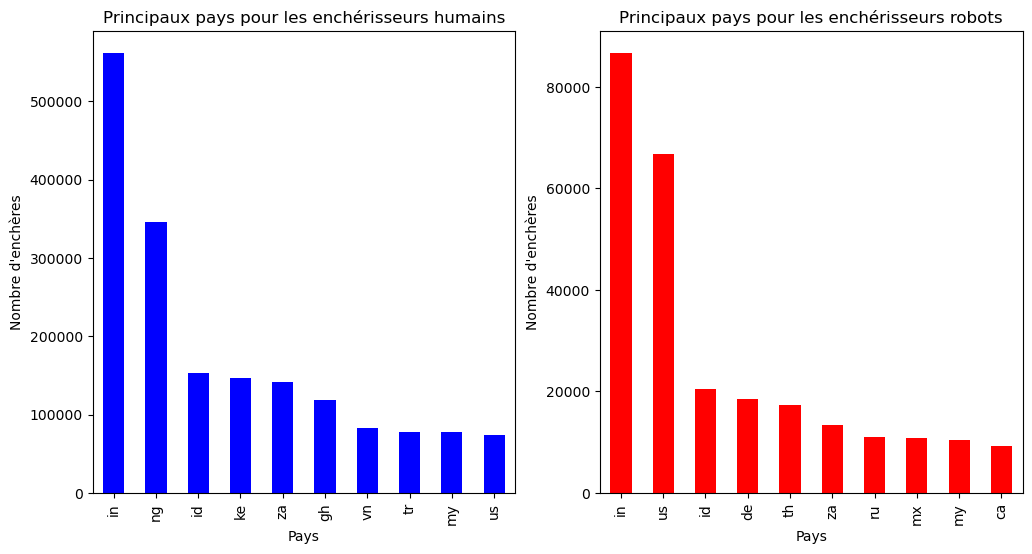

In [30]:
import matplotlib.pyplot as plt

# Grouper par 'outcome' et 'country', compter le nombre d'enchères et trier les résultats
country_counts = temp_df.groupby(['outcome', 'country']).count()[['bid_id']].sort_values(['outcome', 'bid_id'], ascending=False)

# Séparer les données pour les enchérisseurs humains (outcome=0) et les enchérisseurs robots (outcome=1)
humans = country_counts.loc[0].head(10)  # Prendre les 10 premiers pays pour les humains
robots = country_counts.loc[1].head(10)  # Prendre les 10 premiers pays pour les robots

# Créer un graphique à barres pour comparer les principaux pays pour les humains et les robots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
humans['bid_id'].plot(kind='bar', color='blue')
plt.title('Principaux pays pour les enchérisseurs humains')
plt.xlabel('Pays')
plt.ylabel('Nombre d\'enchères')

plt.subplot(1, 2, 2)
robots['bid_id'].plot(kind='bar', color='red')
plt.title('Principaux pays pour les enchérisseurs robots')
plt.xlabel('Pays')
plt.ylabel('Nombre d\'enchères')

plt.tight_layout


### Autres features

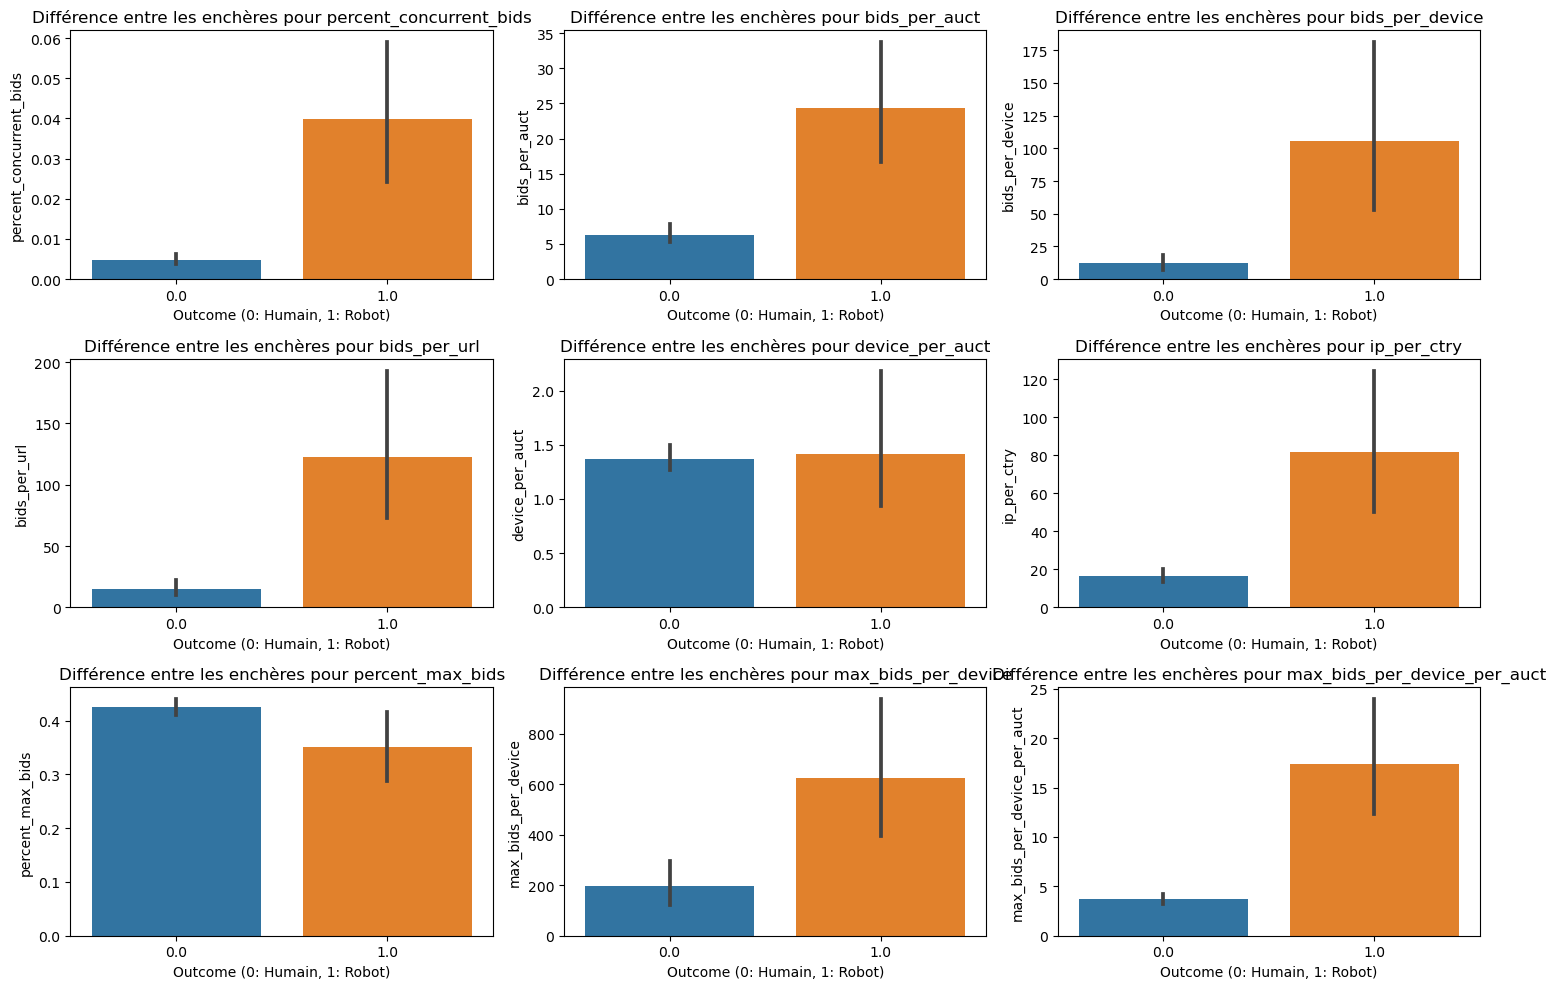

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Caractéristiques à visualiser
features_to_visualize = [
    'percent_concurrent_bids',
    'bids_per_auct',
    'bids_per_device',
    'bids_per_url',
    'device_per_auct',
    'ip_per_ctry',
    'percent_max_bids',
    'max_bids_per_device',
    'max_bids_per_device_per_auct'
]

# Création d'un dataframe séparé pour les enchérisseurs humains et robots
humans_data = train_set[train_set['outcome'] == 0]
robots_data = train_set[train_set['outcome'] == 1]

# Visualisation de la différence entre les enchères humaines et robots pour chaque caractéristique
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x='outcome', y=feature, data=train_set)
    plt.title(f'Différence entre les enchères pour {feature}')
    plt.xlabel('Outcome (0: Humain, 1: Robot)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


**Interpretation**

Nous pouvons remarquer qu'il y a une différence entre les comportements des robots et des humains dans ces features. Donc c'est interessant de les gardés.

## Matrice de coorelation

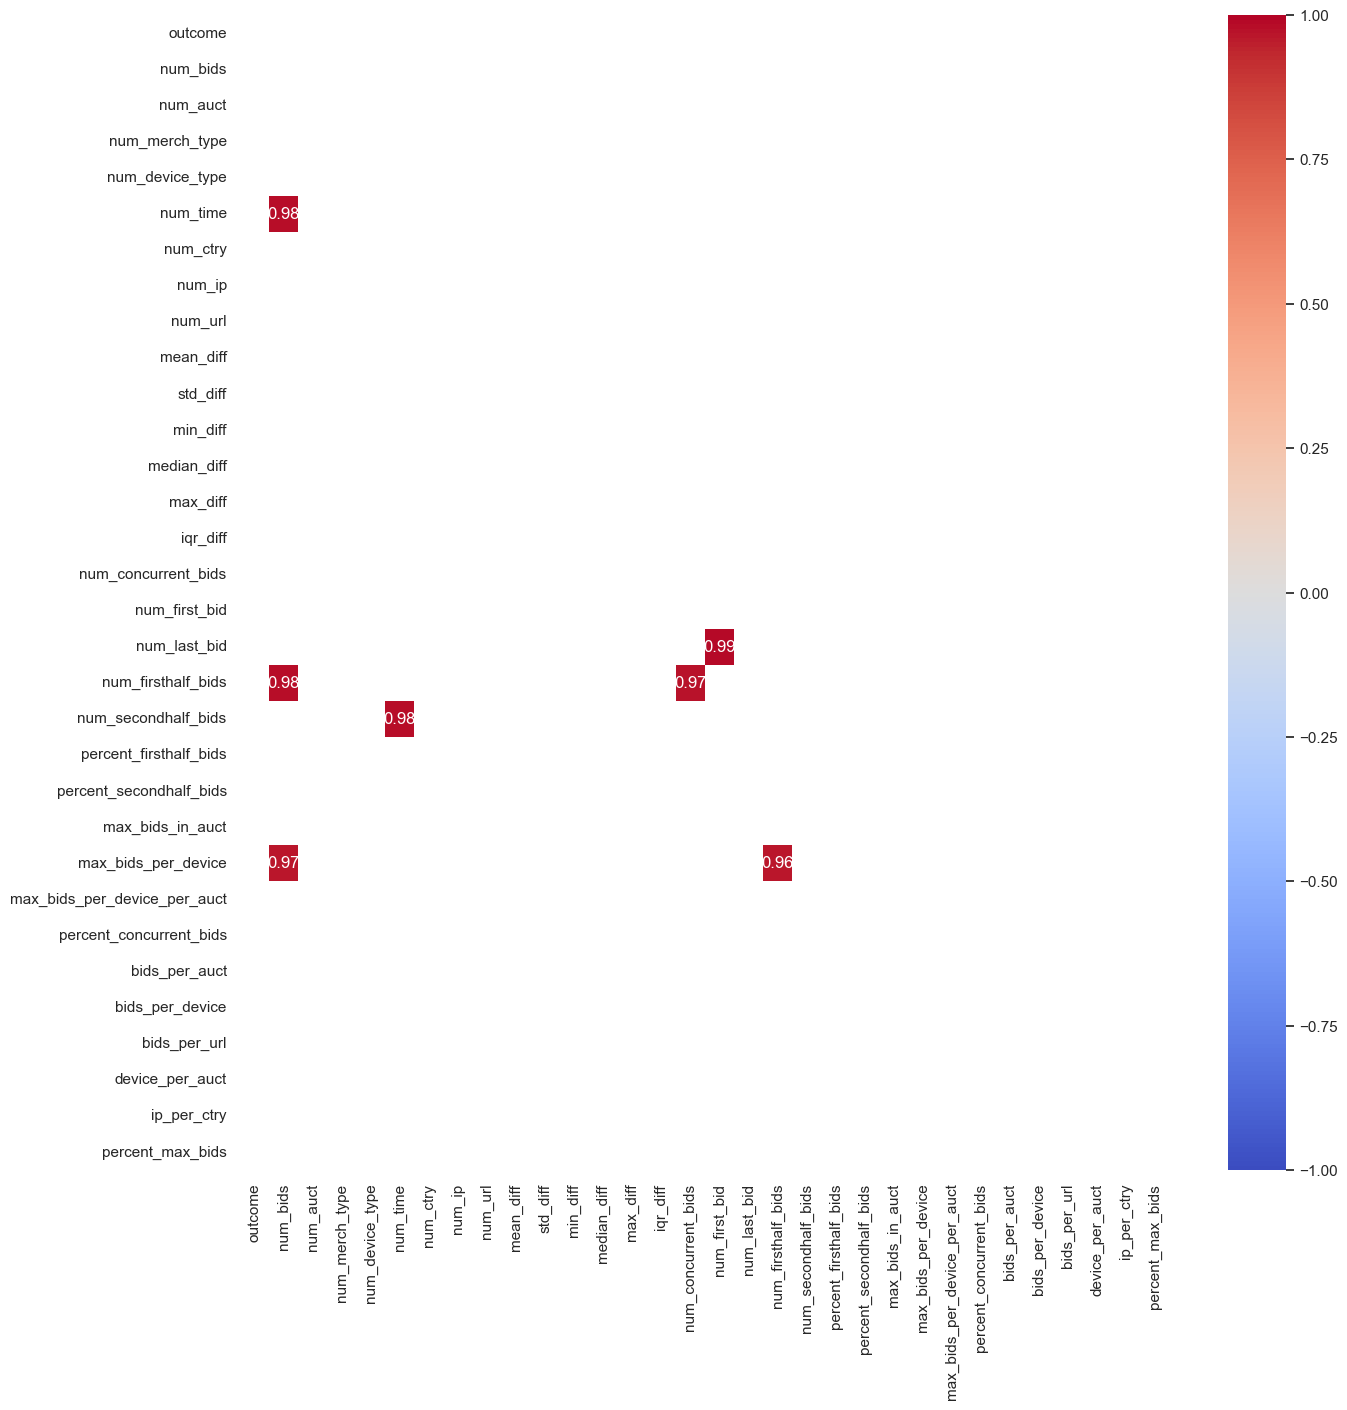

In [32]:
import numpy as np

correlation_data = train_set

# Calculez la matrice de corrélation
correlation_matrix = correlation_data.corr()

# Filtrer la matrice de corrélation pour conserver uniquement les coefficients au-dessus d'un seuil
threshold = 0.96  # pour montrer que les coore les plus grandes
filtered_correlation_matrix = correlation_matrix[
    (correlation_matrix > threshold) | (correlation_matrix < -threshold)
]

# Configurez le style
sns.set(style="white")
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))


fig, ax = plt.subplots(figsize=(15, 15))

# Créez une heatmap avec des annotations et une barre de couleur
sns.heatmap(filtered_correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1)
plt.show()


 On supprime les 3 colonnes avec les coorelations les plus elevées

In [33]:
train_set = train_set.drop(['num_firsthalf_bids','num_time','num_first_bid'],axis=1)

## Fonction Finale :

In [34]:
def preprossecing(data_bids,data_train):
  train_set=count_columns(data_bids,data_train)
  train_set1=time_preprocessing(data_bids,train_set)
  train_set2=auction_preprocessing(data_bids, train_set1)
  train_set3=maxb_auct(data_bids, train_set2)
  train_set4=feature_transformation(data_bids, train_set3)
  train_set4 = train_set4.drop([615, 775, 392, 1669, 1102], axis = 0)
  train_set4 = train_set4.drop('num_merch_type', axis = 1)
  train_set4 = train_set4.drop('bidder_id', axis = 1)
  train_set4 = train_set4.drop(['num_firsthalf_bids','num_time','num_first_bid'],axis=1)
  return train_set4

In [35]:
#train_set.to_csv('preprocessed_data.csv', index=False)

## Densite

In [36]:
all_features = train_set.columns.drop([ 'outcome'])
all_features

Index(['num_bids', 'num_auct', 'num_merch_type', 'num_device_type', 'num_ctry',
       'num_ip', 'num_url', 'mean_diff', 'std_diff', 'min_diff', 'median_diff',
       'max_diff', 'iqr_diff', 'num_concurrent_bids', 'num_last_bid',
       'num_secondhalf_bids', 'percent_firsthalf_bids',
       'percent_secondhalf_bids', 'max_bids_in_auct', 'max_bids_per_device',
       'max_bids_per_device_per_auct', 'percent_concurrent_bids',
       'bids_per_auct', 'bids_per_device', 'bids_per_url', 'device_per_auct',
       'ip_per_ctry', 'percent_max_bids'],
      dtype='object')

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_13628\894707236.py:20: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



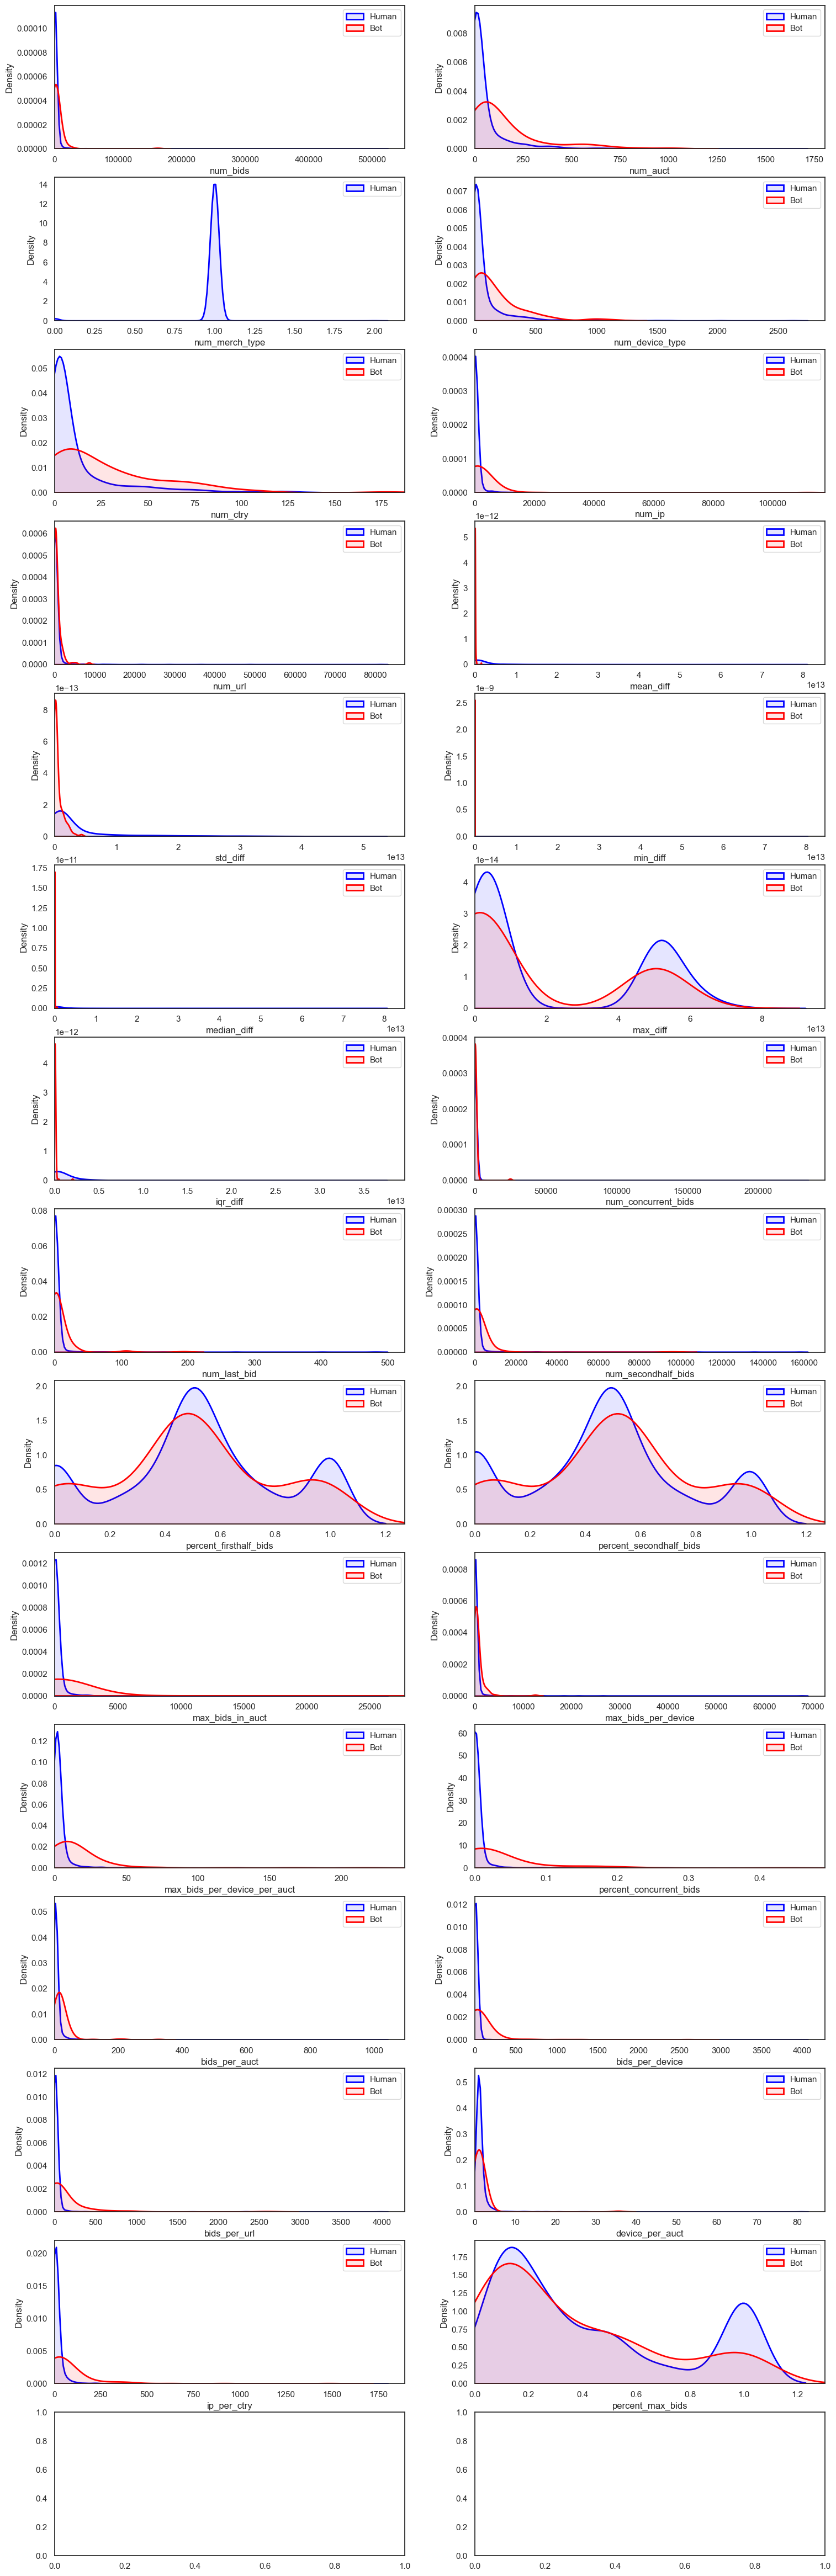

In [37]:
nrows = 15
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 60))

# Boucle à travers chaque caractéristique pour tracer les graphiques de densité
for i, column in enumerate(all_features):
    # Tracé de la densité pour les enchérisseurs humains (outcome = 0)
    humans = sns.kdeplot(data=train_set[train_set['outcome'] == 0],
                         x=column,
                         ax=axes[i // ncols, i % ncols],
                         color='blue',
                         fill=True,
                         alpha=0.1,
                         linewidth=2,
                         label='Human'
                         ).set_xlim(left=0)

    # Tracé de la densité pour les enchérisseurs robots (outcome = 1)
    bots = sns.kdeplot(data=train_set[train_set['outcome'] == 1],
                       x=column,
                       ax=axes[i // ncols, i % ncols],
                       color='red',
                       fill=True,
                       alpha=0.1,
                       linewidth=2,
                       label='Bot'
                       ).set_xlim(left=0)

    # Ajout de la légende à chaque sous-graphique
    axes[i // ncols, i % ncols].legend()

# Affichage
plt.show()

## SMOTE :

- Dans cette partie, nous avons utilisé le SMOTE pour ré-équilibrer nos données puisque nous avons une classe minoritaire qui celle des robots et une classe majoritaire qui est celle des humains.

- Nous obtenons dans cette partie trois dataframes :
 - Données d'entraînement `avant d'appliquer le SMOTE`
 - Données de test
 - Données d'entraînement `après l'application du SMOTE`

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X = train_set.drop('outcome', axis=1)

y= train_set['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Appliquer SMOTE sur l'ensemble d'entraînement
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
test= pd.concat([X_test,y_test],axis=1)
train= pd.concat([X_train,y_train],axis=1)
train_smote= pd.concat([X_resampled, y_resampled],axis=1)

In [ ]:
train_smote.to_csv('train_smote.csv')
train.to_csv('train.csv')
test.to_csv('test.csv')